# Amenities: Features Importance

## Amenities: Data Cleaning 

In [171]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

### Import the data

In [172]:
raw_df = pd.read_csv('listings.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 66641 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20211207182339,2021-12-09,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,85%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56861,-0.11270,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,NaN,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Buil...",$65.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,26,56,86,361,2021-12-09,22,1,1,2010-08-18,2021-11-21,4.86,4.80,4.85,4.80,4.90,4.65,4.75,NaN,f,2,1,1,0,0.16
1,15400,https://www.airbnb.com/rooms/15400,20211207182339,2021-12-09,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,67%,50%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""TV w...",$75.00,3,50,3.0,3.0,50.0,50.0,3.0,50.0,NaN,t,0,0,0,4,2021-12-09,89,0,0,2009-12-21,2020-03-16,4.79,4.84,4.88,4.87,4.82,4.93,4.73,NaN,f,1,1,0,0,0.61
2,17402,https://www.airbnb.com/rooms/17402,20211207182339,2021-12-09,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,Liz,2010-01-04,"Brighton and Hove, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,within an hour,80%,70%,f,https://a0.muscache.com/im/users/67564/profile...,https://a0.muscache.com/im/users/67564/profile...,Fitzrovia,18.0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, Fitzrovia, United Kingdom",Westminster,NaN,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,NaN,2 baths,3.0,3.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Iron...",$265.00,4,365

### Drop the initial values columns 

In [173]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name','description', 'neighborhood_overview','host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

### Checking the Null Values 

In [174]:
df.isna().sum()

id                                                  0
picture_url                                         0
host_since                                         59
host_response_time                              34334
host_response_rate                              34334
host_acceptance_rate                            32993
host_is_superhost                                  59
host_listings_count                                59
host_total_listings_count                          59
host_has_profile_pic                               59
host_identity_verified                             59
neighbourhood                                   26673
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    66641
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                

### Dropping irrelevant columns, due to NaN Values 

In [175]:
df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'license'], axis=1, inplace=True)

df.set_index('id', inplace=True) # The id will be used as the index, as t

In [176]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

59


,picture_url,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
116268,https://a0.muscache.com/pictures/855414/0f978d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enfield,51.61137,-0.11888,Private room in townhouse,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Hot water"", ""Heating"", ""Fire extinguisher"", ...",$25.00,5,730,5.0,5.0,730.0,730.0,5.0,730.0,NaN,t,12,13,22,207,28,6,0,2013-07-06,2021-08-28,4.89,4.96,4.89,5.00,5.00,4.75,4.93,f,1,0,1,0,0.27
3552939,https://a0.muscache.com/pictures/10bdc948-53a2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"London, United Kingdom",Westminster,51.52360,-0.19294,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Shampoo"", ""Washer"", ""Carbon monoxide alarm"",...",$100.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,6,36,66,66,4,0,0,2015-01-05,2017-08-14,5.00,4.50,4.75,5.00,5.00,5.00,5.00,f,1,1,0,0,0.05
3983143,https://a0.muscache.com/pictures/50093870/391b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"London, United Kingdom",Hounslow,51.49056,-0.25628,Entire residential home,Entire home/apt,8,NaN,2.5 baths,4.0,4.0,"[""Shampoo"", ""Washer"", ""Heating"", ""TV with stan...",$215.00,4,1125,4.0,4.0,1125.0,1125.0,4.0,1125.0,NaN,t,0,0,0,0,12,0,0,2015-07-09,2017-06-09,5.00,5.00,5.00,5.00,4.91,5.00,4.91,f,1,1,0,0,0.15
4627239,https://a0.muscache.com/pictures/48f5ca89-93b7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"London, United Kingdom",Southwark,51.46838,-0.07331,Entire residential home,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Shampoo"", ""Washer"", ""Heating"", ""Essentials"",...",$100.00,2,1125,2.0,3.0,1125.0,1125.0,2.3,1125.0,NaN,t,0,0,0,0,14,0,0,2014-12-11,2016-08-13,4.64,4.64,4.57,4.86,4.86,4.71,4.71,f,1,1,0,0,0.16
5462756,https://a0.muscache.com/pictures/69389972/3191...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"London, United Kingdom",Lambeth,51.48103,-0.11191,Entire condominium (condo),Entire home/apt,5,NaN,1 bath,2.0,3.0,"[""Children\u2019s books and toys for ages 0-2 ...",$120.00,3,40,3.0,5.0,40.0,40.0,3.1,40.0,NaN,t,9,30,60,60,115,5,0,2015-06-09,2021-11-08,4.88,4.92,4.80,4.92,4.95,4.72,4.82,f,2,1,1,0,1.45


### Continue to drop columns not needed 

In [177]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [178]:
df.drop([ 'latitude', 'longitude', 'neighbourhood'], axis=1, inplace=True)

In [179]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [180]:
# Number of rows without a value for multiple host-related columns
len(df[df.loc[ :,[ 'host_is_superhost', 'host_listings_count', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])

0

### Cleaning Amenities column  

In [181]:
# Example of amenities listed
df.amenities[:1].values

array(['["Hot water", "Heating", "Coffee maker", "Building staff", "TV with standard cable", "Pack \\u2019n play/Travel crib", "Children\\u2019s books and toys", "Fire extinguisher", "Iron", "Free parking on premises", "Lock on bedroom door", "Luggage dropoff allowed", "Dryer", "Hair dryer", "Room-darkening shades", "Stove", "Oven", "Babysitter recommendations", "Wifi", "Cooking basics", "Long term stays allowed", "Kitchen", "Paid parking off premises", "Carbon monoxide alarm", "Patio or balcony", "Cable TV", "Essentials", "Ethernet connection", "Smoke alarm", "Free street parking", "Bathtub", "Extra pillows and blankets", "Hangers", "Bed linens", "Shampoo", "Washer", "Children\\u2019s dinnerware", "Outlet covers", "Refrigerator", "Dishes and silverware", "Dedicated workspace", "Crib"]'],
      dtype=object)

In [182]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 'and office chair',
 'Sonos surround sound system  Bluetooth sound system',
 'Children\\u2019s books and toys for ages 0-2 years old and 5-10 years old',
 'Faith In Nature. Please request as kept in storage cupboards. conditioner',
 'dove or other brands body soap',
 '19\\ TV with Amazon Prime Video',
 'Liz Earle body soap',
 'beko stove',
 'Logik stainless steel oven',
 "Kiehl's conditioner",
 'Speakers for audio-in / phone / device sound system with aux',
 '32\\ TV with Chromecast',
 'and 10+ years old',
 'Samsung  Bluetooth sound system',
 'Faith in Nature - Wild Rose (100% nature fragrance',
 'Verdi body soap',
 'Wonerboom Bluetooth sound system',
 'Sea Kelp body soap',
 'Fast wifi \\u2013 220 Mbps',
 'Radox',
 '70\\ HDTV with Amazon Prime Video',
 'Portable air conditioning',
 'Double fan oven with grill and second oven. Six rings including wok ring oven',
 'Cole & Lewis shampoo',
 'Outdoor seating',
 'Own Brand shampoo',
 'Large fridge/freezer refrigerator',
 'NA body soap'

In [183]:
### Locking the amenities to simplify them 

In [184]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/var/folders/0k/qsrs17bs5n1gr22p3vddn0xm0000gn/T/ipykernel_1378/1426836555.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1


### Replacing the nulls with 0 and then remove amenities columns that are less then 10% of the listings 

In [185]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,41:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['air_conditioning', 'high_end_electronics', 'bbq', 'nature_and_views', 'gym', 'child_friendly', 'outdoor_space', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [186]:
df.columns[40:] ##showing the remaining listings 

Index(['balcony', 'bed_linen', 'breakfast', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'parking', 'host_greeting',
       'internet', 'long_term_stays', 'private_entrance'],
      dtype='object')

In [187]:
### Changing the price into float and remove comma 

In [188]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [189]:
df.head()

,picture_url,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,check_in_24h,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,parking,host_greeting,internet,long_term_stays,private_entrance
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13913,https://a0.muscache.com/pictures/miso/Hosting-...,2009-11-16,within a few hours,100%,f,3.0,t,t,Islington,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,NaN,65,1,29,NaN,t,26,56,86,361,22,1,1,2010-08-18,2021-11-21,4.86,4.80,4.85,4.80,4.90,4.65,4.75,f,0.16,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
15400,https://a0.muscache.com/pictures/428392/462d26...,2009-12-05,within a day,67%,f,1.0,t,t,Kensington and Chelsea,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,75,3,50,NaN,t,0,0,0,4,89,0,0,2009-12-21,2020-03-16,4.79,4.84,4.88,4.87,4.82,4.93,4.73,f,0.61,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
17402,https://a0.muscache.com/pictures/39d5309d-fba7...,2010-01-04,within an hour,80%,f,18.0,t,t,Westminster,Entire rental unit,Entire home/apt,6,NaN,2 baths,3.0,3.0,265,4,365,NaN,t,4,34,60,295,43,1,0,2011-03-21,2021-06-28,4.69,4.80,4.68,4.66,4.66,4.85,4.59,f,0.33,NaN,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
17506,https://a0.muscache.com/pictures/11901327/e63d...,2010-01-05,NaN,NaN,f,3.0,t,t,Hammersmith and Fulham,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,150,3,21,NaN,t,29,59,89,364,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25123,https://a0.muscache.com/pictures/456905/a004b9...,2010-04-05,NaN,NaN,f,3.0,t,t,Barnet,Private room in residential home,Private room,2,NaN,1.5 shared baths,1.0,NaN,29,10,1120,NaN,t,0,0,0,0,129,0,0,2010-04-14,2020-03-15,4.78,4.70,4.94,4.91,4.89,4.45,4.74,t,0.91,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [190]:
df.info() #showing the finalized data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66641 entries, 13913 to 53713050
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   picture_url                  66641 non-null  object 
 1   host_since                   66582 non-null  object 
 2   host_response_time           32307 non-null  object 
 3   host_response_rate           32307 non-null  object 
 4   host_is_superhost            66582 non-null  object 
 5   host_listings_count          66582 non-null  float64
 6   host_has_profile_pic         66582 non-null  object 
 7   host_identity_verified       66582 non-null  object 
 8   neighbourhood_cleansed       66641 non-null  object 
 9   property_type                66641 non-null  object 
 10  room_type                    66641 non-null  object 
 11  accommodates                 66641 non-null  int64  
 12  bathrooms                    0 non-null      float64
 13  bathrooms

### Made a new copy of the cleaned data with the only the price and chosen amenities in each column

In [191]:
df2 = df[["price", "balcony", "bed_linen","breakfast", "tv", "coffee_machine", "cooking_basics", "white_goods","elevator", "parking", "host_greeting", "internet", "long_term_stays", "private_entrance"]]

In [192]:
df2 #the amenities are encoded to nominal variables 

,price,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,parking,host_greeting,internet,long_term_stays,private_entrance
id,,,,,,,,,,,,,,
13913,65,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
15400,75,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
17402,265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
17506,150,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25123,29,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53709893,120,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
53710986,288,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
53711668,104,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [193]:
def clean_dataset(df3):
    assert isinstance(df3, pd.DataFrame), "df needs to be a pd.DataFrame"  
    df.dropna(inplace=True)
    indices_to_keep = ~df3.isin([np.nan, np.inf, -np.inf]).any(1)
    return df2[indices_to_keep].astype(np.float64) #to ensure that there's no null values and the feature importance result can work

## Feature Importance Using Decision Tree

In [194]:
# Putting feature variable to X
X = df3.drop('price',axis=1)

# Putting response variable to y
y = df3['price']

### Import Train-Test split 

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((46648, 13), (19993, 13))

### Import Decision Tree Classifier 

In [197]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
dt = DecisionTreeClassifier(max_depth=3,random_state=43)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=43)

In [199]:
### Import confusion matrix and accuract score 

In [200]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [201]:
dt = DecisionTreeClassifier(random_state=43)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=43)

In [202]:
y_train_pred = dt.predict(X_train) #predict the X_train 
y_test_pred = dt.predict(X_test)  #predict the X_test 

In [203]:
print(accuracy_score(y_train, y_train_pred)) #the accuracy score of train model 
confusion_matrix(y_train, y_train_pred) #the confusion matrix of train model

0.1083004630423598


array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [204]:
print(accuracy_score(y_test, y_test_pred)) #the accuracy score of test model 
confusion_matrix(y_test, y_test_pred) #the confusion matrix of test model 

0.04281498524483569


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [205]:
# Let's check the overall accuracy.
trainaccuracy= accuracy_score(y_train, y_train_pred)
testaccuracy= accuracy_score(y_test, y_test_pred)

confusion_TRN = confusion_matrix(y_train, y_train_pred)
confusion_TST = confusion_matrix(y_test, y_test_pred)

### Checking the Confusion Matrix(true positve/negative, false positive/negative) 

In [206]:
TP = confusion_TRN[1,1] # true positive 
TN = confusion_TRN[0,0] # true negatives
FP = confusion_TRN[0,1] # false positives
FN = confusion_TRN[1,0] # false negatives

TP_TST = confusion_TST[1,1] # true positive 
TN_TST = confusion_TST[0,0] # true negatives
FP_TST = confusion_TST[0,1] # false positives
FN_TST = confusion_TST[1,0] # false negatives

trainsensitivity= TP / float(TP+FN)
trainspecificity= TN / float(TN+FP)

testsensitivity= TP_TST / float(TP_TST+FN_TST)
testspecificity= TN_TST / float(TN_TST+FP_TST)

# Let us compare the values obtained for Train & Test:
print('-'*30)
print('On Train Data')
print('-'*30)
print("Accuracy    : {} %".format(round((trainaccuracy*100),2)))
print("Sensitivity : {} %".format(round((trainsensitivity*100),2)))
print("Specificity : {} %".format(round((trainspecificity*100),2)))
print('-'*30)
print('On Test Data')
print('-'*30)
print("Accuracy    : {} %".format(round((testaccuracy*100),2)))
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))
print('-'*30)

------------------------------
On Train Data
------------------------------
Accuracy    : 10.83 %
Sensitivity : nan %
Specificity : 100.0 %
------------------------------
On Test Data
------------------------------
Accuracy    : 4.28 %
Sensitivity : nan %
Specificity : 100.0 %
------------------------------


/var/folders/0k/qsrs17bs5n1gr22p3vddn0xm0000gn/T/ipykernel_1378/742187470.py:11: RuntimeWarning: invalid value encountered in true_divide
  trainsensitivity= TP / float(TP+FN)
/var/folders/0k/qsrs17bs5n1gr22p3vddn0xm0000gn/T/ipykernel_1378/742187470.py:14: RuntimeWarning: invalid value encountered in true_divide
  testsensitivity= TP_TST / float(TP_TST+FN_TST)


### Import the GridSearchCV to check the best parameters for Decision Tree 

In [207]:
from sklearn.model_selection import GridSearchCV

In [208]:
dt_hp = DecisionTreeClassifier(random_state=43)

params = {'max_depth':[3,5,7,10],
          'min_samples_leaf':[5,10,15,20],
          'min_samples_split':[10,12,18,20],
          'criterion':['gini','entropy']}
GS = GridSearchCV(estimator=dt_hp,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

In [209]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


/Users/ogheneatoma/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/ogheneatoma/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=43), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [10, 12, 18, 20]},
             scoring='accuracy', verbose=True)

In [210]:
print('Best Parameters:',GS.best_params_,end='\n\n')
print('Best Score:',GS.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 10}

Best Score: 0.04531804787178981


In [211]:
dt_hp = DecisionTreeClassifier(max_depth= 9,min_samples_leaf= 25, min_samples_split=5 ,random_state=43)

In [212]:
dt_hp.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=25, min_samples_split=5,
                       random_state=43)

In [213]:
y_train_pred = dt_hp.predict(X_train)
y_test_pred = dt_hp.predict(X_test)

# Let's check the overall accuracy.
trainaccuracy= accuracy_score(y_train, y_train_pred)
testaccuracy= accuracy_score(y_test, y_test_pred)

confusion_TRN = confusion_matrix(y_train, y_train_pred)
confusion_TST = confusion_matrix(y_test, y_test_pred)

TP = confusion_TRN[1,1] # true positive 
TN = confusion_TRN[0,0] # true negatives
FP = confusion_TRN[0,1] # false positives
FN = confusion_TRN[1,0] # false negatives

TP_TST = confusion_TST[1,1] # true positive 
TN_TST = confusion_TST[0,0] # true negatives
FP_TST = confusion_TST[0,1] # false positives
FN_TST = confusion_TST[1,0] # false negatives

trainsensitivity= TP / float(TP+FN)
trainspecificity= TN / float(TN+FP)

testsensitivity= TP_TST / float(TP_TST+FN_TST)
testspecificity= TN_TST / float(TN_TST+FP_TST)

# Let us compare the values obtained for Train & Test:
print('-'*30)
print('On Train Data')
print('-'*30)
print("Accuracy    : {} %".format(round((trainaccuracy*100),2)))
print("Sensitivity : {} %".format(round((trainsensitivity*100),2)))
print("Specificity : {} %".format(round((trainspecificity*100),2)))
print('-'*30)
print('On Test Data')
print('-'*30)
print("Accuracy    : {} %".format(round((testaccuracy*100),2)))
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))
print('-'*30)

------------------------------
On Train Data
------------------------------
Accuracy    : 6.17 %
Sensitivity : nan %
Specificity : 100.0 %
------------------------------
On Test Data
------------------------------
Accuracy    : 4.36 %
Sensitivity : nan %
Specificity : 100.0 %
------------------------------


/var/folders/0k/qsrs17bs5n1gr22p3vddn0xm0000gn/T/ipykernel_1378/1361111424.py:21: RuntimeWarning: invalid value encountered in true_divide
  trainsensitivity= TP / float(TP+FN)
/var/folders/0k/qsrs17bs5n1gr22p3vddn0xm0000gn/T/ipykernel_1378/1361111424.py:24: RuntimeWarning: invalid value encountered in true_divide
  testsensitivity= TP_TST / float(TP_TST+FN_TST)


### Creating a dictionary of amenity features and show their importance values

In [214]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, dt_hp.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [215]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

In [216]:
feat_df

,Feature,Importance
0,parking,0.151693
1,white_goods,0.118065
2,tv,0.100431
3,coffee_machine,0.086321
4,long_term_stays,0.085711
5,cooking_basics,0.082711
6,host_greeting,0.076711
7,elevator,0.075797
8,bed_linen,0.067902
9,private_entrance,0.061708


### Plotting the Amenity Features and Its Importance using Matplotlib 

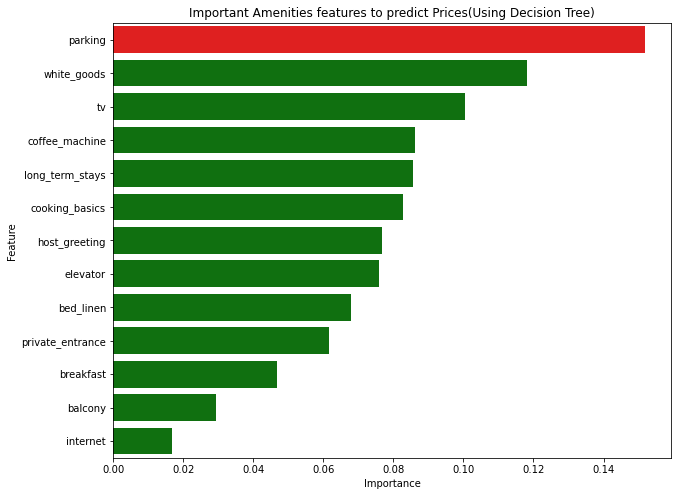

In [217]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important Amenities features to predict Prices(Using Decision Tree)')
plt.show()

## Feature importance using Random Forest Regression 

In [218]:
# Putting feature variable to X
X = df3.drop('price',axis=1)

# Putting response variable to y
y = df3['price']

### Importing Train-test split 

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((46648, 13), (19993, 13))

### Importing RandomForestClassifier 

In [224]:
from sklearn.ensemble import RandomForestRegressor

In [225]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5)

RF.fit(X_train, y_train)
# Predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

In [226]:
# The model accurracies and validation analysis
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, trainPredictin_RF),
        mean_squared_error(y_test, testPredictin_RF)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, trainPredictin_RF),
        r2_score(y_test, testPredictin_RF)))

Random Forest MSE train: 98938.573, test: 129645.968
Random Forest R^2 train: 0.126, test: 0.100


### Creating feature importance of the amenities 

In [227]:
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Importance'], index= X_train.columns)
feat_imp1.sort_values(by=['Importance'], ascending= False, inplace=True)
feat_imp1

,Importance
white_goods,0.160957
parking,0.135472
tv,0.130015
bed_linen,0.118897
private_entrance,0.095442
elevator,0.065974
long_term_stays,0.057819
internet,0.055268
host_greeting,0.050992
coffee_machine,0.044802


In [228]:
feat_imp = pd.DataFrame({'Importance':RF.feature_importances_})  #creating a data of the features and importance 
feat_imp['Feature'] = X_train.columns

feat_imp.sort_values(by='Importance', inplace=True)
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)

feat_imp = feat_imp[["Feature", "Importance"]]
feat_imp

,Feature,Importance
6,white_goods,0.160957
8,parking,0.135472
3,tv,0.130015
1,bed_linen,0.118897
12,private_entrance,0.095442
7,elevator,0.065974
11,long_term_stays,0.057819
10,internet,0.055268
9,host_greeting,0.050992
4,coffee_machine,0.044802


### Plotting the Amenity Features and Its Importance using Matplotlib 

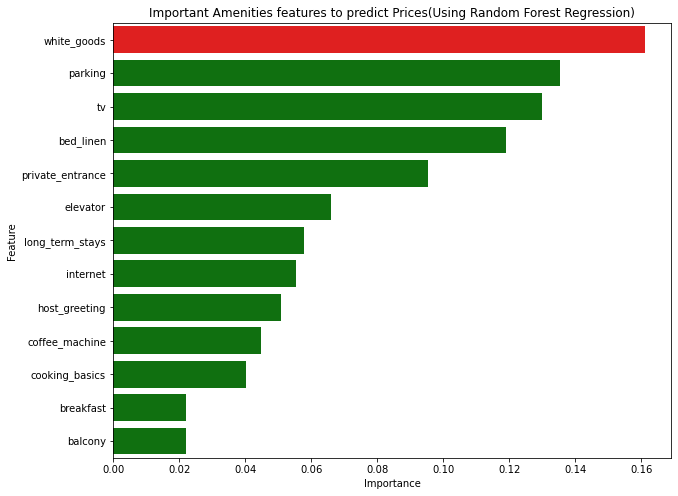

In [229]:
values = feat_imp.Importance    
idx = feat_imp.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title= 'Important Amenities features to predict Prices(Using Random Forest Regression)')
plt.show()